In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/credit_card_purchases.csv')

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [ ]:
print(df.shape)

(1296675, 24)


In [ ]:
duplicate = df[df.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [Unnamed: 0, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud, merch_zipcode]
Index: []

[0 rows x 24 columns]


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

Data Transformation

In [ ]:
#Convert transaction date/time into separate columns
df[['trans_date', 'trans_time']] = df['trans_date_trans_time'].str.split(' ', expand=True)

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,trans_date,trans_time
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0,2019-01-01,00:00:18
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN,2019-01-01,00:00:44
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0,2019-01-01,00:00:51
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN,2019-01-01,00:01:16
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0,2019-01-01,00:03:06


#Created new df after dropping trans_date_trans_time

In [ ]:
new_df = df.drop('trans_date_trans_time', axis=1)

In [ ]:
new_df.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,trans_date,trans_time
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0,2019-01-01,00:00:18
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN,2019-01-01,00:00:44
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0,2019-01-01,00:00:51
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN,2019-01-01,00:01:16
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0,2019-01-01,00:03:06


#Remove unnamed col

In [ ]:
new_df = new_df.drop('Unnamed: 0', axis=1)

In [ ]:
new_df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,trans_date,trans_time
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0,2019-01-01,00:00:18
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN,2019-01-01,00:00:44
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0,2019-01-01,00:00:51
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN,2019-01-01,00:01:16
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0,2019-01-01,00:03:06


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   cc_num         1296675 non-null  int64  
 1   merchant       1296675 non-null  object 
 2   category       1296675 non-null  object 
 3   amt            1296675 non-null  float64
 4   first          1296675 non-null  object 
 5   last           1296675 non-null  object 
 6   gender         1296675 non-null  object 
 7   street         1296675 non-null  object 
 8   city           1296675 non-null  object 
 9   state          1296675 non-null  object 
 10  zip            1296675 non-null  int64  
 11  lat            1296675 non-null  float64
 12  long           1296675 non-null  float64
 13  city_pop       1296675 non-null  int64  
 14  job            1296675 non-null  object 
 15  dob            1296675 non-null  object 
 16  trans_num      1296675 non-null  object 
 17  unix_tim

In [ ]:
#Set transaction date to datetime format
new_df['trans_date'] = pd.to_datetime(new_df['trans_date'])

In [ ]:
#Set date of birth column to datetime format
new_df['dob'] = pd.to_datetime(new_df['dob'])

#Create Year of Birth Column
new_df['year_of_birth'] = new_df['dob'].dt.year

#Create Current Year Columns
new_df['year_of_transaction'] = new_df['trans_date'].dt.year

#Calculate Age Column
new_df['age'] = new_df['year_of_transaction'] - new_df['year_of_birth']

In [ ]:
new_df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode,trans_date,trans_time,year_of_birth,year_of_transaction,age
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,1325376018,36.011293,-82.048315,0,28705.0,2019-01-01,00:00:18,1988,2019,31
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,1325376044,49.159047,-118.186462,0,NaN,2019-01-01,00:00:44,1978,2019,41
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,1325376051,43.150704,-112.154481,0,83236.0,2019-01-01,00:00:51,1962,2019,57
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,1325376076,47.034331,-112.561071,0,NaN,2019-01-01,00:01:16,1967,2019,52
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,1325376186,38.674999,-78.632459,0,22844.0,2019-01-01,00:03:06,1986,2019,33


Check for null values

In [ ]:
# Check for missing values
print("\nMissing values in each column:")
print(new_df.isnull().sum())


Missing values in each column:
cc_num                      0
merchant                    0
category                    0
amt                         0
first                       0
last                        0
gender                      0
street                      0
city                        0
state                       0
zip                         0
lat                         0
long                        0
city_pop                    0
job                         0
dob                         0
trans_num                   0
unix_time                   0
merch_lat                   0
merch_long                  0
is_fraud                    0
merch_zipcode          195973
trans_date                  0
trans_time                  0
year_of_birth               0
year_of_transaction         0
age                         0
dtype: int64


Exploratory Plots

In [ ]:
total_fraud = new_df['is_fraud'].sum()
print(total_fraud)
not_fraud = len(new_df) - total_fraud
print(not_fraud)

7506
1289169


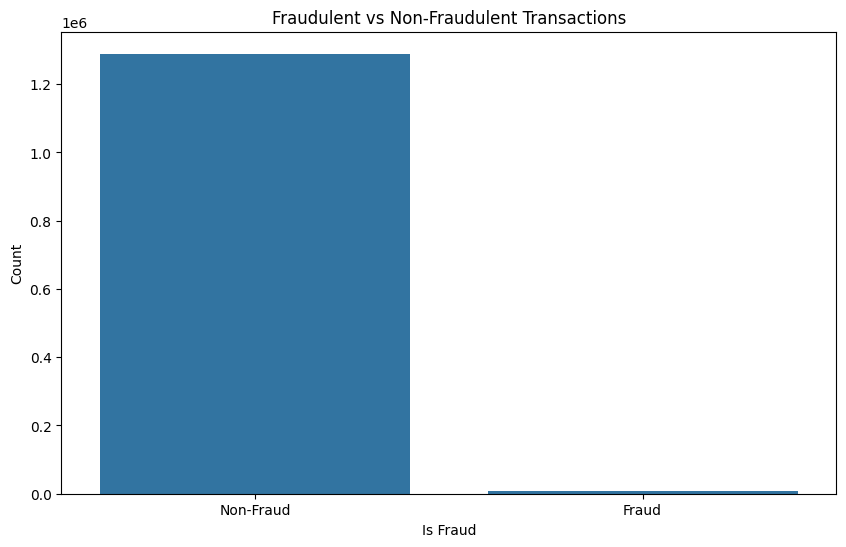

In [ ]:
# Plot distribution of fraudulent vs. non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.countplot(x='is_fraud', data=new_df)
plt.title('Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.show()

<ipython-input-26-7e39026ee996>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_df, x='category', order=new_df['category'].value_counts().index, palette='viridis')


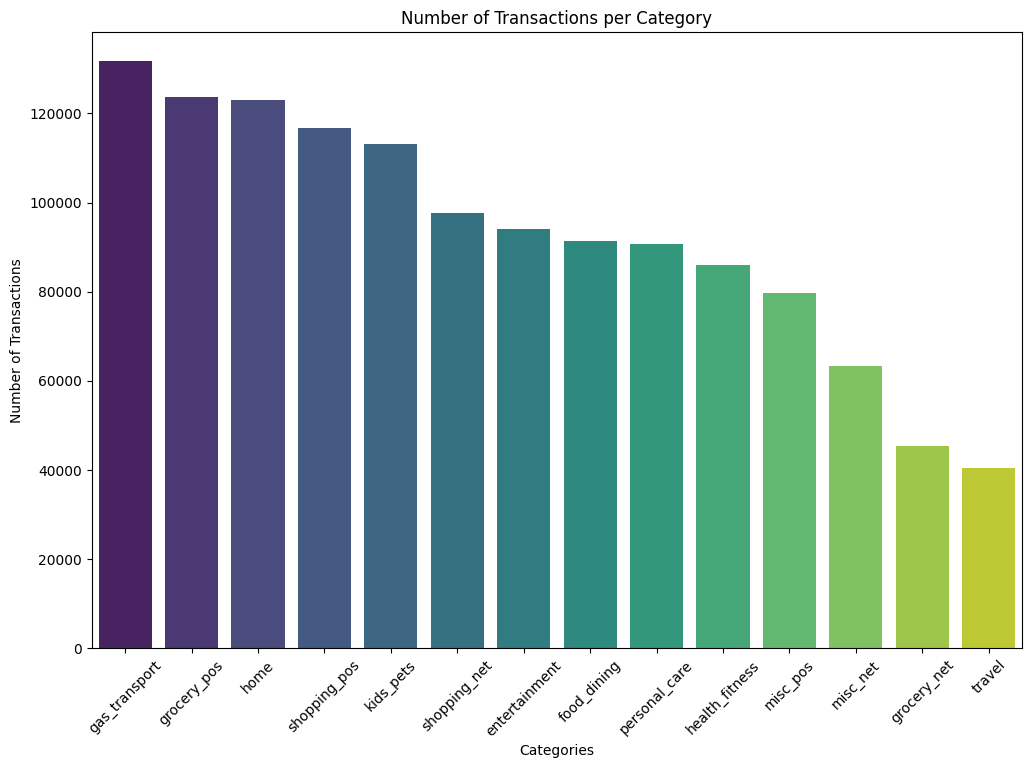

In [ ]:
# Plot number of transactions per category
plt.figure(figsize=(12, 8))
sns.countplot(data=new_df, x='category', order=new_df['category'].value_counts().index, palette='viridis')
plt.title('Number of Transactions per Category')
plt.xlabel('Categories')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

<ipython-input-27-46aa53d3b387>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_df, x='gender', palette='viridis')


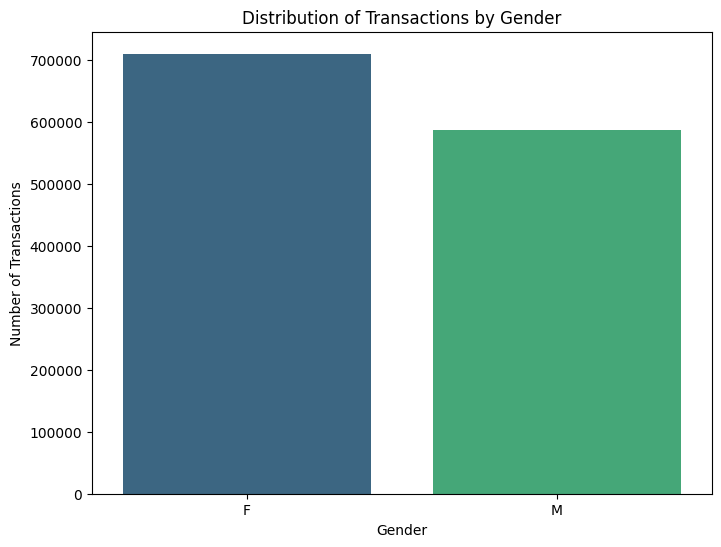

In [ ]:
#Gender
# Plot distribution of transactions by gender
plt.figure(figsize=(8, 6))
sns.countplot(data=new_df, x='gender', palette='viridis')
plt.title('Distribution of Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.show()

<ipython-input-28-97e0980102d3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='category', x='is_fraud', data=fraud_cat_totals_sort, palette='viridis')


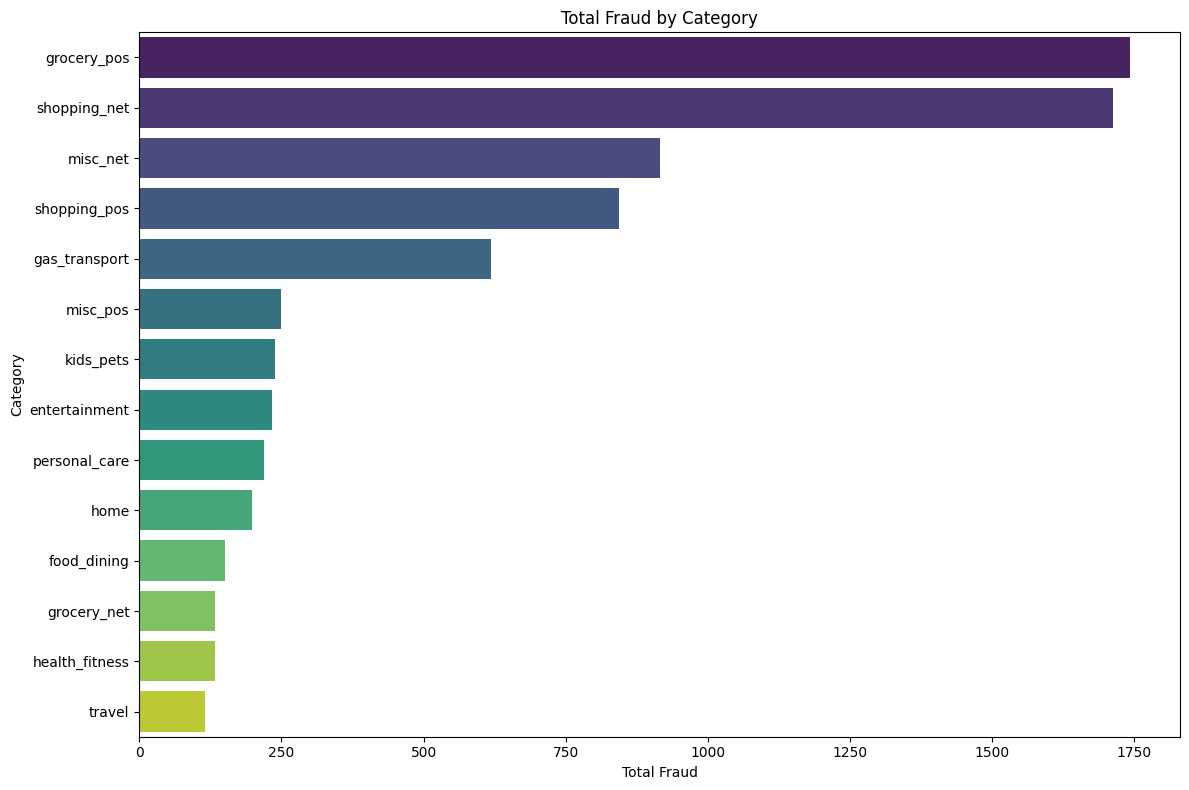

In [ ]:
# No. of fraud transactions per category
fraud_cat_totals = new_df.groupby('category')['is_fraud'].sum().reset_index()

# Sorting by amount in descending order
fraud_cat_totals_sort = fraud_cat_totals.sort_values(by='is_fraud', ascending=False)

# Creating a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(y='category', x='is_fraud', data=fraud_cat_totals_sort, palette='viridis')
plt.title('Total Fraud by Category')
plt.xlabel('Total Fraud')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

In [ ]:
print(fraud_cat_totals_sort)

          category  is_fraud
4      grocery_pos      1743
11    shopping_net      1713
8         misc_net       915
12    shopping_pos       843
2    gas_transport       618
9         misc_pos       250
7        kids_pets       239
0    entertainment       233
10   personal_care       220
6             home       198
1      food_dining       151
3      grocery_net       134
5   health_fitness       133
13          travel       116


<ipython-input-30-f2478d921e38>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='is_fraud', x='gender', data=fraud_gender_totals_sort, palette='viridis', )


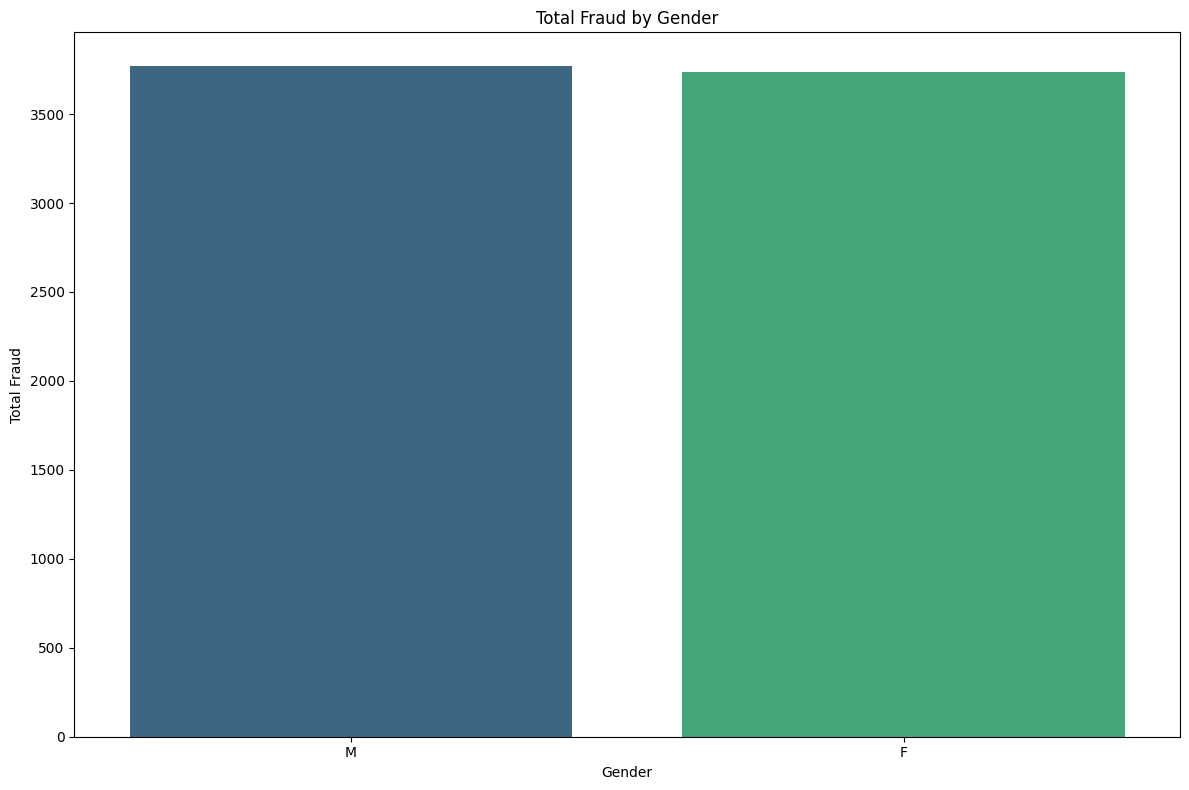

In [ ]:
# No. of fraud transactions per gender
fraud_gender_totals = new_df.groupby('gender')['is_fraud'].sum().reset_index()

# Sorting by amount in descending order
fraud_gender_totals_sort = fraud_gender_totals.sort_values(by='is_fraud', ascending=False)

# Creating a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(y='is_fraud', x='gender', data=fraud_gender_totals_sort, palette='viridis', )
plt.title('Total Fraud by Gender')
plt.ylabel('Total Fraud')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

In [ ]:
print(fraud_gender_totals_sort)
# This data concludes there is equal proportionality of male and female.

  gender  is_fraud
1      M      3771
0      F      3735


Based on Age


In [ ]:
age_count =new_df['age'].value_counts()
age_count.sort_index()

,count
age,
14,1318
15,5817
16,5104
17,1191
18,3901
...,...
92,4450
93,5684
94,1722


Fraud Below 18 and above 18

In [ ]:
def age_group(age):
    if age < 18:
        return 'Under 18'
    else:
        return '18+'

# Apply the function to the Age column
new_df['Age_Bucket'] = new_df['age'].apply(age_group)

In [ ]:
new_df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,merch_lat,merch_long,is_fraud,merch_zipcode,trans_date,trans_time,year_of_birth,year_of_transaction,age,Age_Bucket
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,36.011293,-82.048315,0,28705.0,2019-01-01,00:00:18,1988,2019,31,18+
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,49.159047,-118.186462,0,NaN,2019-01-01,00:00:44,1978,2019,41,18+
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,43.150704,-112.154481,0,83236.0,2019-01-01,00:00:51,1962,2019,57,18+
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,47.034331,-112.561071,0,NaN,2019-01-01,00:01:16,1967,2019,52,18+
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,38.674999,-78.632459,0,22844.0,2019-01-01,00:03:06,1986,2019,33,18+


Age_Bucket
18+         1283245
Under 18      13430
Name: count, dtype: int64


<ipython-input-35-94be761e3476>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_df, x='Age_Bucket', order=new_df['Age_Bucket'].value_counts().index, palette='viridis')


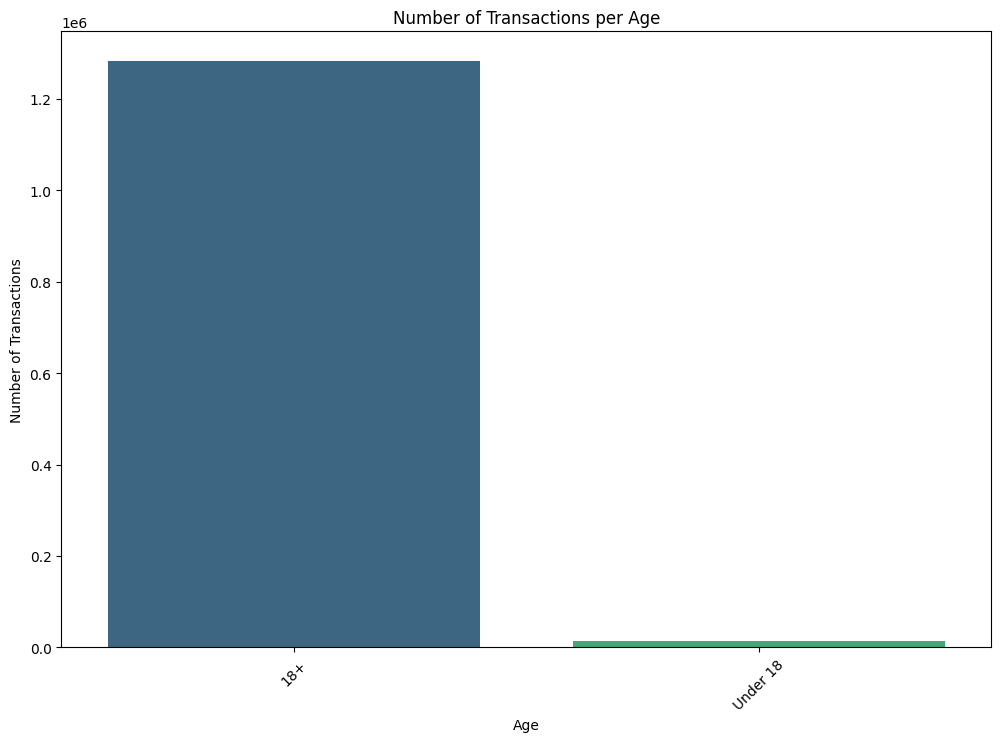

In [ ]:
# Transaction By Age (Under 18 & Above 18)
print(new_df['Age_Bucket'].value_counts())
plt.figure(figsize=(12, 8))
sns.countplot(data=new_df, x='Age_Bucket', order=new_df['Age_Bucket'].value_counts().index, palette='viridis')
plt.title('Number of Transactions per Age')
plt.xlabel('Age')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


<ipython-input-36-c747ca92b43f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='is_fraud', x='Age_Bucket', data=fraud_age_totals_sort, palette='viridis', )


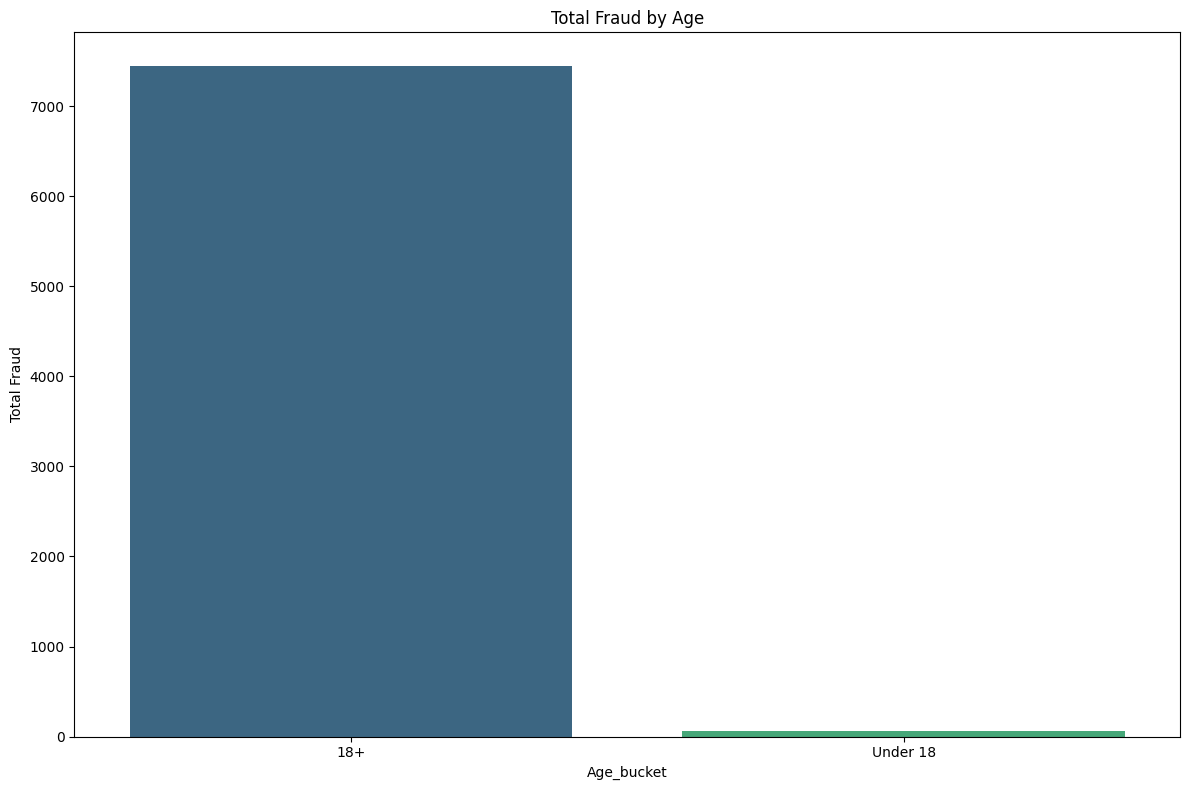

In [ ]:
# Fraud By Age

fraud_age_totals = new_df.groupby('Age_Bucket')['is_fraud'].sum().reset_index()

# Sorting by amount in descending order
fraud_age_totals_sort = fraud_age_totals.sort_values(by='is_fraud', ascending=False)

# Creating a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(y='is_fraud', x='Age_Bucket', data=fraud_age_totals_sort, palette='viridis', )
plt.title('Total Fraud by Age')
plt.xlabel('Age_bucket')
plt.ylabel('Total Fraud')
plt.tight_layout()
plt.show()

In [ ]:
print(fraud_age_totals_sort)

# The dataset indicates that individuals aged 18 and older have a significantly higher incidence of fraud (7,446 cases)
#  compared to those under 18 (60 cases).

  Age_Bucket  is_fraud
0        18+      7446
1   Under 18        60


In [ ]:
# Custom function to categorize ages
def age_group(age):
    if age < 18:
        return 'Under 18'
    elif 18 <= age < 30:
        return '18-29'
    elif 30 <= age < 60:
        return '30-59'
    elif 60 <= age < 80:
        return '60-79'
    else:
        return '80 +'

# Apply the function to the Age column
new_df['Age_grp'] = new_df['age'].apply(age_group)

# Display the DataFrame
print(new_df[[ 'age', 'Age_grp']])

         age Age_grp
0         31   30-59
1         41   30-59
2         57   30-59
3         52   30-59
4         33   30-59
...      ...     ...
1296670   59   30-59
1296671   41   30-59
1296672   53   30-59
1296673   40   30-59
1296674   25   18-29

[1296675 rows x 2 columns]


Age_grp
30-59       789519
18-29       215049
60-79       211550
80 +         67127
Under 18     13430
Name: count, dtype: int64


<ipython-input-39-ff9d5569baaa>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_df, x='Age_grp', order=new_df['Age_grp'].value_counts().index, palette='viridis')


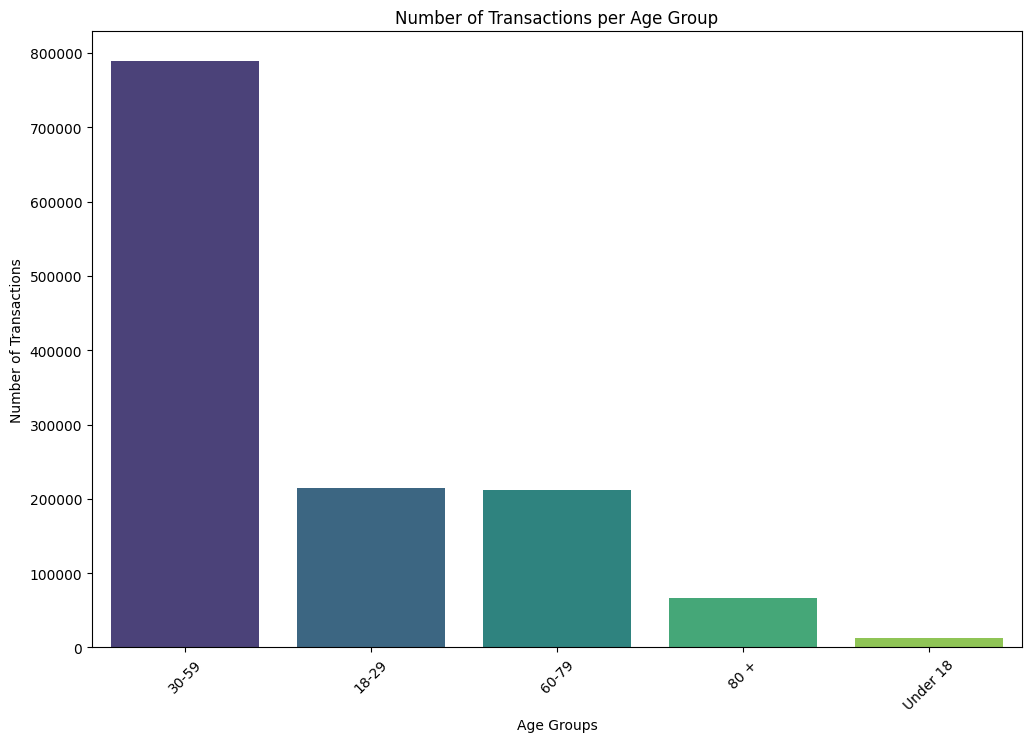

In [ ]:
# Transaction by Age Group
print(new_df['Age_grp'].value_counts())
plt.figure(figsize=(12, 8))
sns.countplot(data=new_df, x='Age_grp', order=new_df['Age_grp'].value_counts().index, palette='viridis')
plt.title('Number of Transactions per Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

<ipython-input-40-bf7220ae1485>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='is_fraud', x='Age_grp', data=fraud_age_grp_totals_sort, palette='viridis')


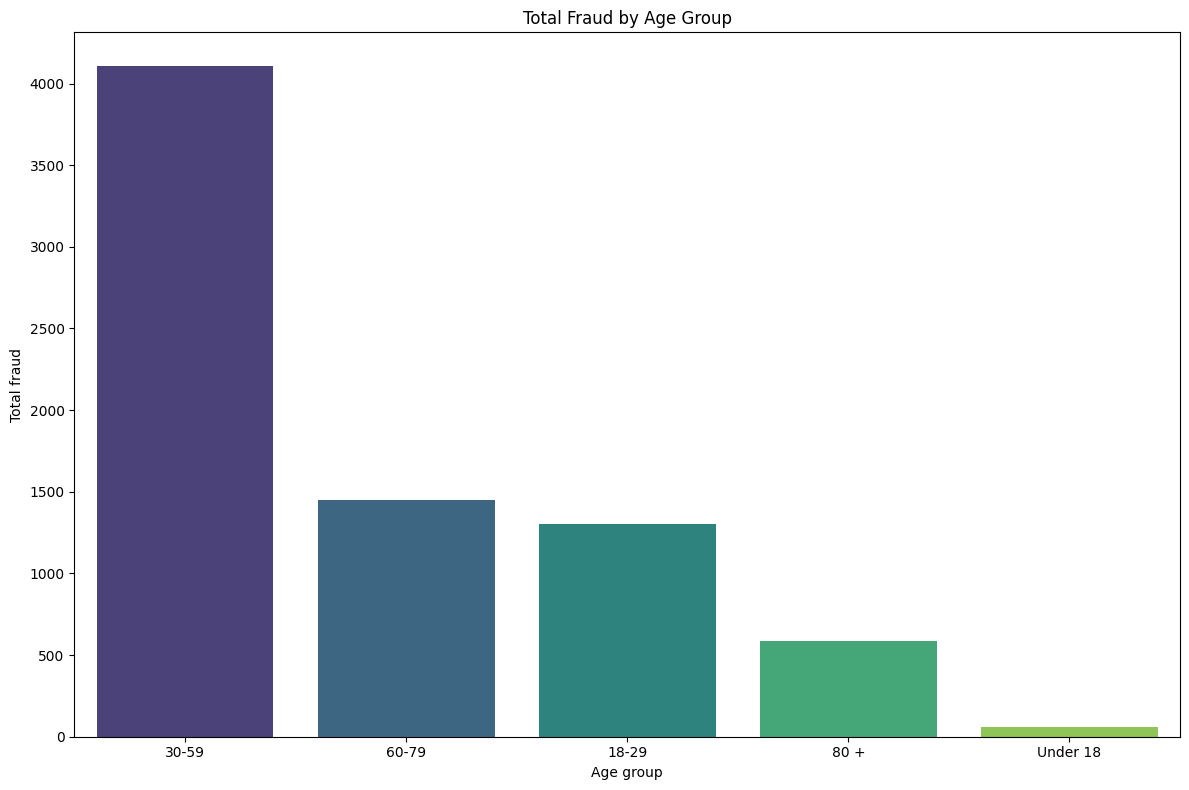

In [ ]:
 # Fraud beased on Age group
fraud_age_grp_totals = new_df.groupby('Age_grp')['is_fraud'].sum().reset_index()

# Sorting by amount in descending order
fraud_age_grp_totals_sort = fraud_age_grp_totals.sort_values(by='is_fraud', ascending=False)

# Creating a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(y='is_fraud', x='Age_grp', data=fraud_age_grp_totals_sort, palette='viridis')
plt.title('Total Fraud by Age Group')
plt.xlabel('Age group')
plt.ylabel('Total fraud')
plt.tight_layout()
plt.show()

In [ ]:
print(fraud_age_grp_totals_sort)

# The most fraud transactions are done by individuals who belong to age group 30-59

    Age_grp  is_fraud
1     30-59      4108
2     60-79      1451
0     18-29      1302
3      80 +       585
4  Under 18        60


Geographic Based Plots

In [ ]:
#Number of states
state_counts = new_df['state'].value_counts()
print(state_counts.nunique())
print(state_counts)

51
state
TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786
CO    13880
MA    12376
SD    12324
VT    11768
MT    11754
AZ    10770
UT    10699
NH     8278
CT     7702
NV     5607
ID     5545
DC     3613
HI     2559
AK     2120
RI      550
DE        9
Name: count, dtype: int64


<ipython-input-43-12841e5fbe01>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=new_df, x='state', order=new_df['state'].value_counts().index, palette='viridis')


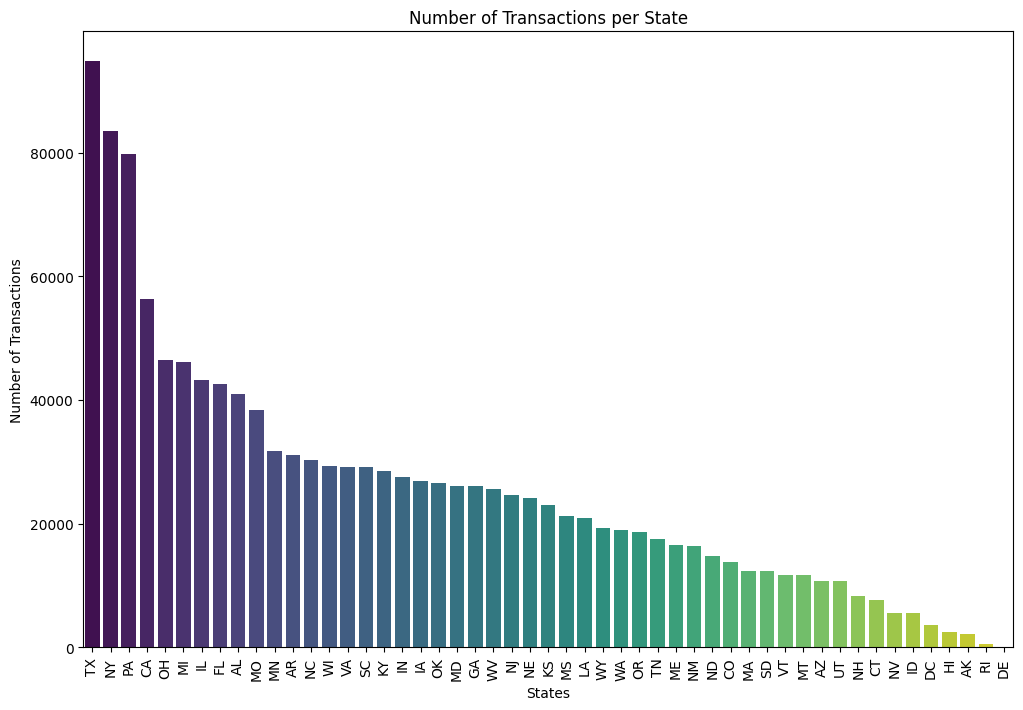

In [ ]:
# Transactions by State
plt.figure(figsize=(12, 8))
sns.countplot(data=new_df, x='state', order=new_df['state'].value_counts().index, palette='viridis')
plt.title('Number of Transactions per State')
plt.xlabel('States')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()

<ipython-input-44-66ecc9c564d6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='state', x='is_fraud', data=state_total_fraud_sort,palette='viridis')


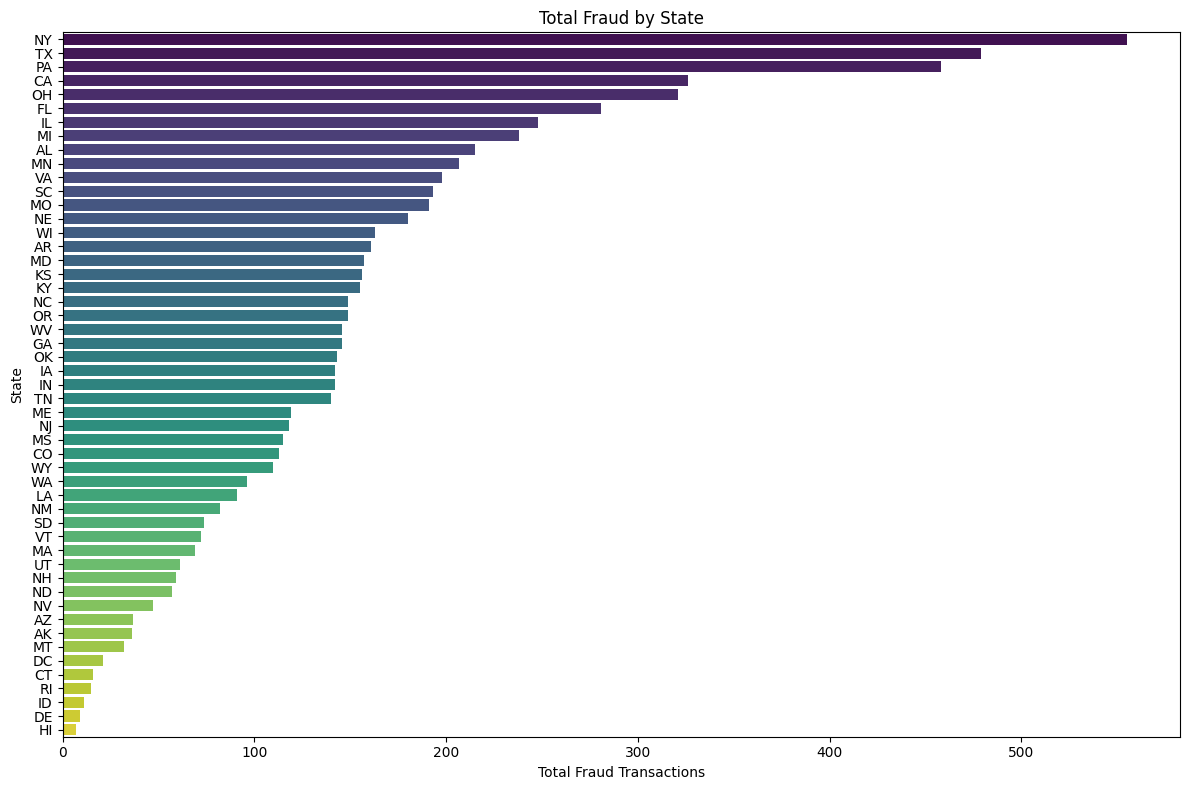

In [ ]:
#Fraud By State
state_total_fraud = df.groupby('state')['is_fraud'].sum().reset_index()

# Sorting by amount in descending order
state_total_fraud_sort = state_total_fraud.sort_values(by='is_fraud', ascending=False)

# Creating a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(y='state', x='is_fraud', data=state_total_fraud_sort,palette='viridis')
plt.title('Total Fraud by State')
plt.xlabel('Total Fraud Transactions')
plt.ylabel('State')
plt.tight_layout()
plt.show()



From the graphs of fraud transactions by states and total transactions by the states we get that those states who have done more transactions, have done more fraud transactions.

In [ ]:
print(state_total_fraud_sort)

   state  is_fraud
34    NY       555
43    TX       479
38    PA       458
4     CA       326
35    OH       321
9     FL       281
14    IL       248
22    MI       238
1     AL       215
23    MN       207
45    VA       198
40    SC       193
24    MO       191
29    NE       180
48    WI       163
2     AR       161
20    MD       157
16    KS       156
17    KY       155
27    NC       149
37    OR       149
49    WV       146
10    GA       146
36    OK       143
12    IA       142
15    IN       142
42    TN       140
21    ME       119
31    NJ       118
25    MS       115
5     CO       113
50    WY       110
47    WA        96
18    LA        91
32    NM        82
41    SD        74
46    VT        72
19    MA        69
44    UT        61
30    NH        59
28    ND        57
33    NV        47
3     AZ        37
0     AK        36
26    MT        32
7     DC        21
6     CT        16
39    RI        15
13    ID        11
8     DE         9
11    HI         7


In [ ]:
#Total cities
city_counts = new_df['city'].value_counts()
print(city_counts)

city
Birmingham     5617
San Antonio    5130
Utica          5105
Phoenix        5075
Meridian       5060
               ... 
Karns City        7
Bruce             7
Claypool          7
Streator          7
Vacaville         7
Name: count, Length: 894, dtype: int64


<ipython-input-47-45f470959287>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_cities.values, y=top_20_cities.index, palette='viridis')


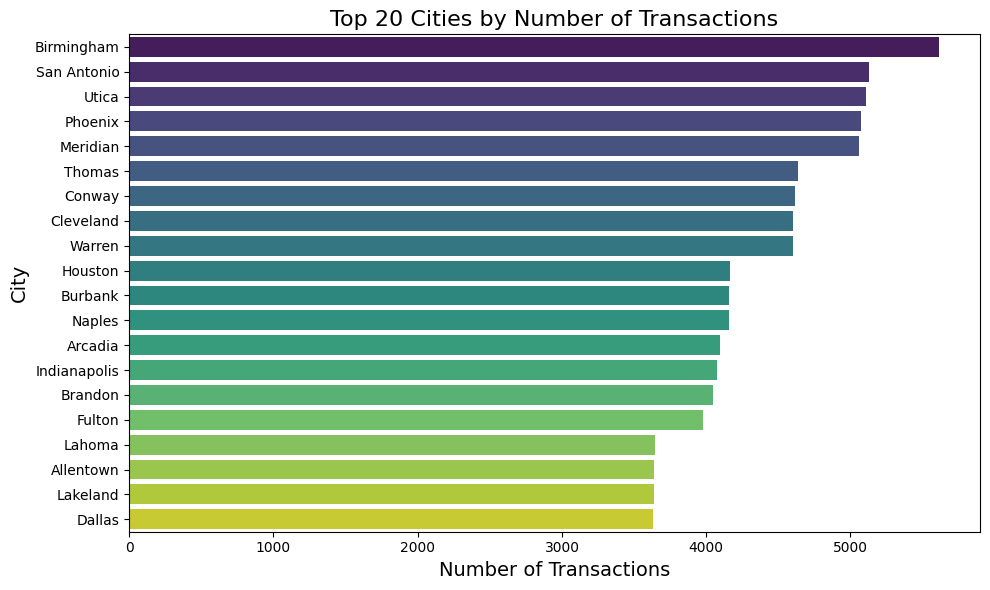

In [ ]:
# Transaction by city
top_20_cities = city_counts.head(20)
# Creating a bar plot for the top 20 cities
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_cities.values, y=top_20_cities.index, palette='viridis')

# Adding titles and labels
plt.title('Top 20 Cities by Number of Transactions', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=14)
plt.ylabel('City', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

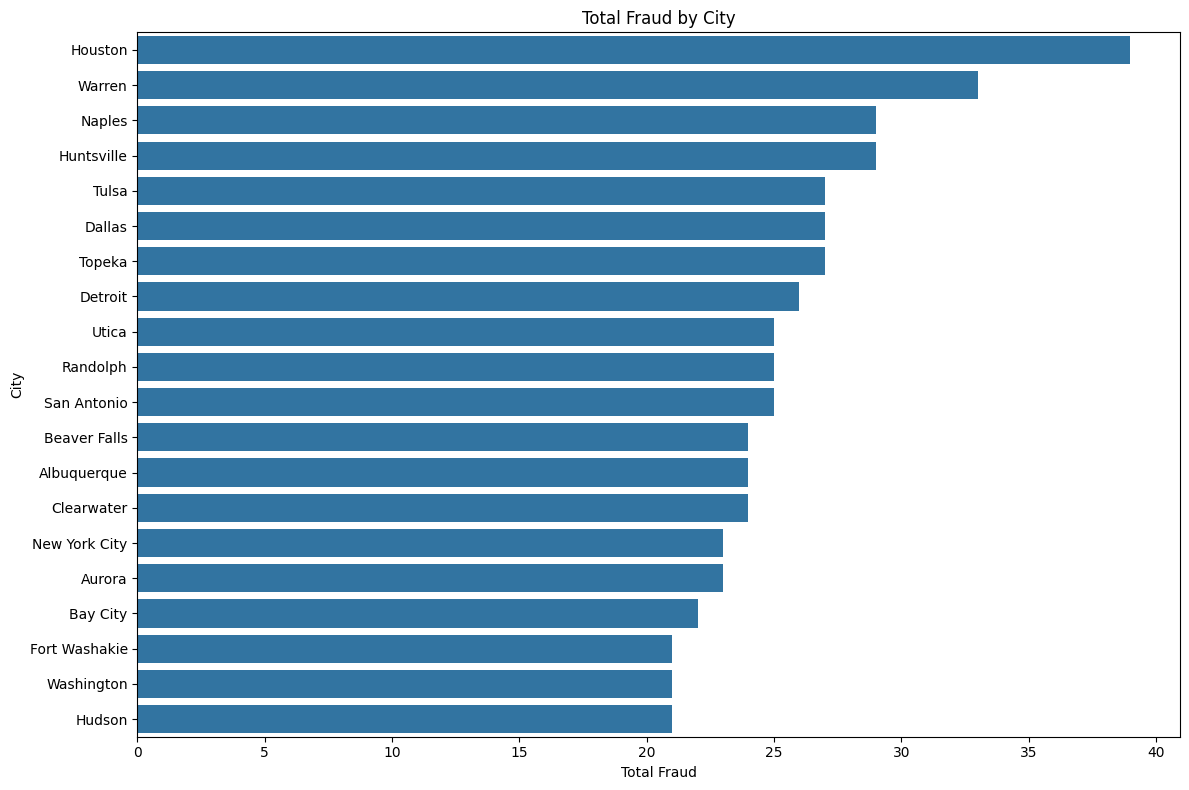

In [ ]:
#Fraud per city
city_total_fraud = new_df.groupby('city')['is_fraud'].sum().reset_index()

# Sorting by amount in descending order
city_total_fraud_sort = city_total_fraud.sort_values(by='is_fraud', ascending=False)

top_n = 20

fraud_city_totals = city_total_fraud_sort.head(top_n)

# Creating a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(y='city', x='is_fraud', data=fraud_city_totals)
plt.title('Total Fraud by City')
plt.xlabel('Total Fraud')
plt.ylabel('City')
plt.tight_layout()
plt.show()


In [ ]:
print(fraud_city_totals)

              city  is_fraud
359        Houston        39
837         Warren        33
554         Naples        29
368     Huntsville        29
810          Tulsa        27
193         Dallas        27
806         Topeka        27
212        Detroit        26
821          Utica        25
676       Randolph        25
725    San Antonio        25
59    Beaver Falls        24
6      Albuquerque        24
153     Clearwater        24
564  New York City        23
40          Aurora        23
55        Bay City        22
272  Fort Washakie        21
839     Washington        21
364         Hudson        21


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 29 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   cc_num               1296675 non-null  int64         
 1   merchant             1296675 non-null  object        
 2   category             1296675 non-null  object        
 3   amt                  1296675 non-null  float64       
 4   first                1296675 non-null  object        
 5   last                 1296675 non-null  object        
 6   gender               1296675 non-null  object        
 7   street               1296675 non-null  object        
 8   city                 1296675 non-null  object        
 9   state                1296675 non-null  object        
 10  zip                  1296675 non-null  int64         
 11  lat                  1296675 non-null  float64       
 12  long                 1296675 non-null  float64       
 1

Fraud by Time

In [ ]:
new_df['trans_time']= pd.to_datetime(new_df['trans_time'])
new_df['trans_hour']= new_df['trans_time'].dt.hour

<ipython-input-51-8ff93e6cf7ee>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_df['trans_time']= pd.to_datetime(new_df['trans_time'])


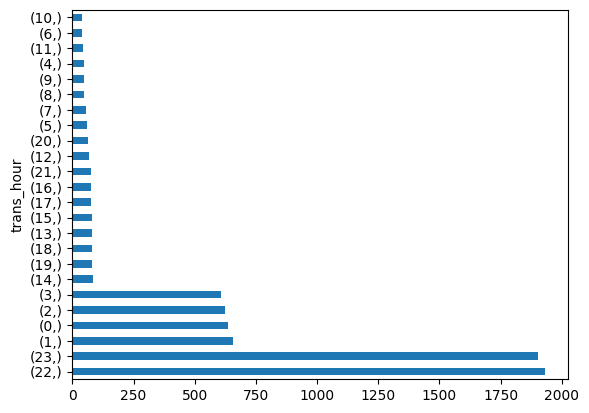

In [ ]:
new_df[new_df['is_fraud']==1][['trans_hour']].value_counts().plot(kind='barh')
plt.show()

# More fraud transactions are done during midnight.

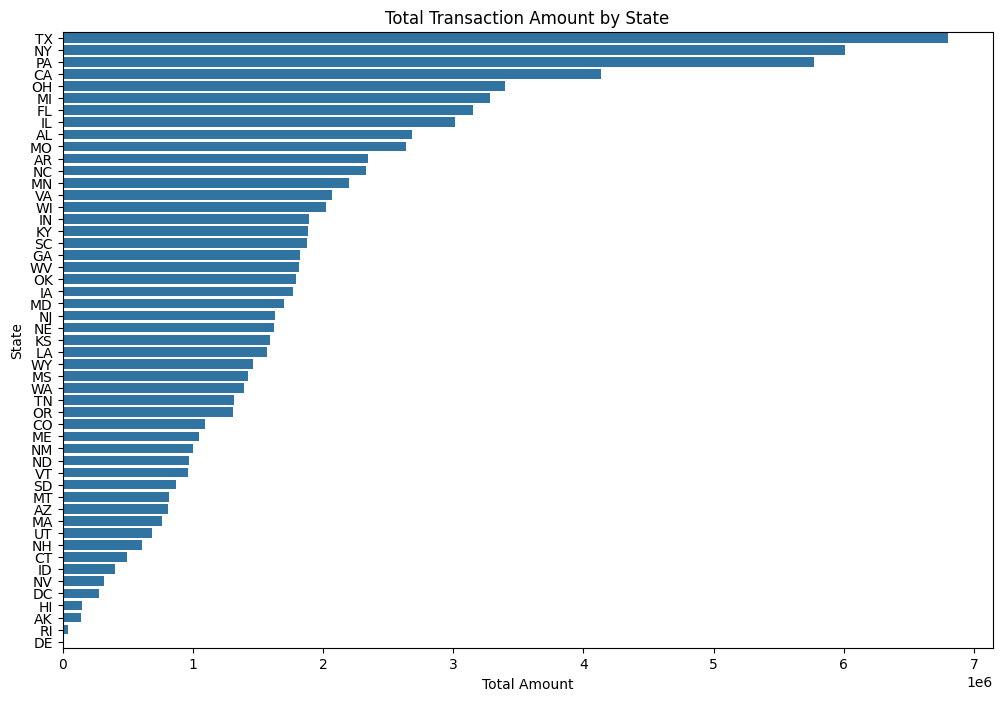

In [ ]:
# Amount transcted by state
state_totals = df.groupby('state')['amt'].sum().reset_index()

# Sorting by amount in descending order
state_totals = state_totals.sort_values(by='amt', ascending=False)

# Creating a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(y='state', x='amt', data=state_totals)
plt.title('Total Transaction Amount by State')
plt.xlabel('Total Amount')
plt.ylabel('State')
plt.show()


job
Film/video editor                 9779
Exhibition designer               9199
Naval architect                   8684
Surveyor, land/geomatics          8680
Materials engineer                8270
                                  ... 
Veterinary surgeon                   8
Armed forces technical officer       8
Ship broker                          7
Contracting civil engineer           7
Warehouse manager                    7
Name: count, Length: 494, dtype: int64


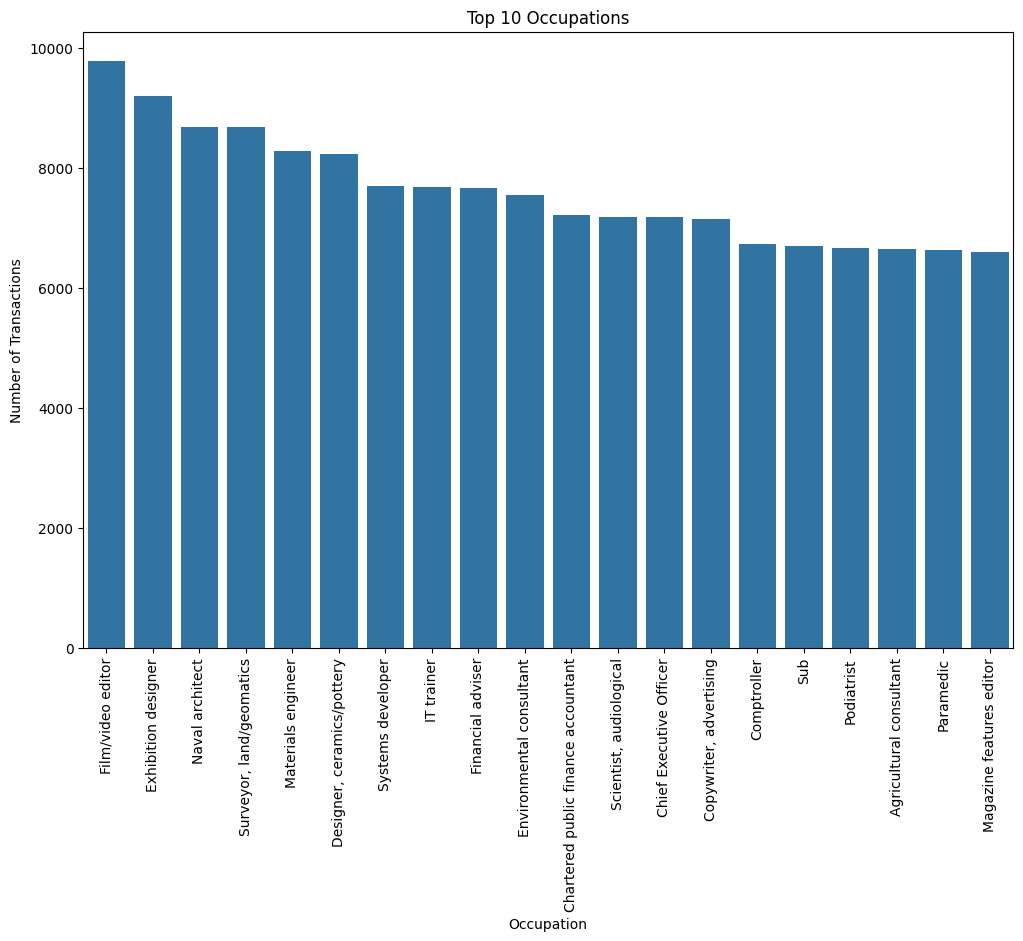

In [ ]:
# Occupation distribution
occupation_counts = df['job'].value_counts()
print(occupation_counts)

# Plot top 20 occupations
plt.figure(figsize=(12, 8))
sns.barplot(x=occupation_counts.head(20).index, y=occupation_counts.head(20).values)
plt.title('Top 10 Occupations')
plt.xlabel('Occupation')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()


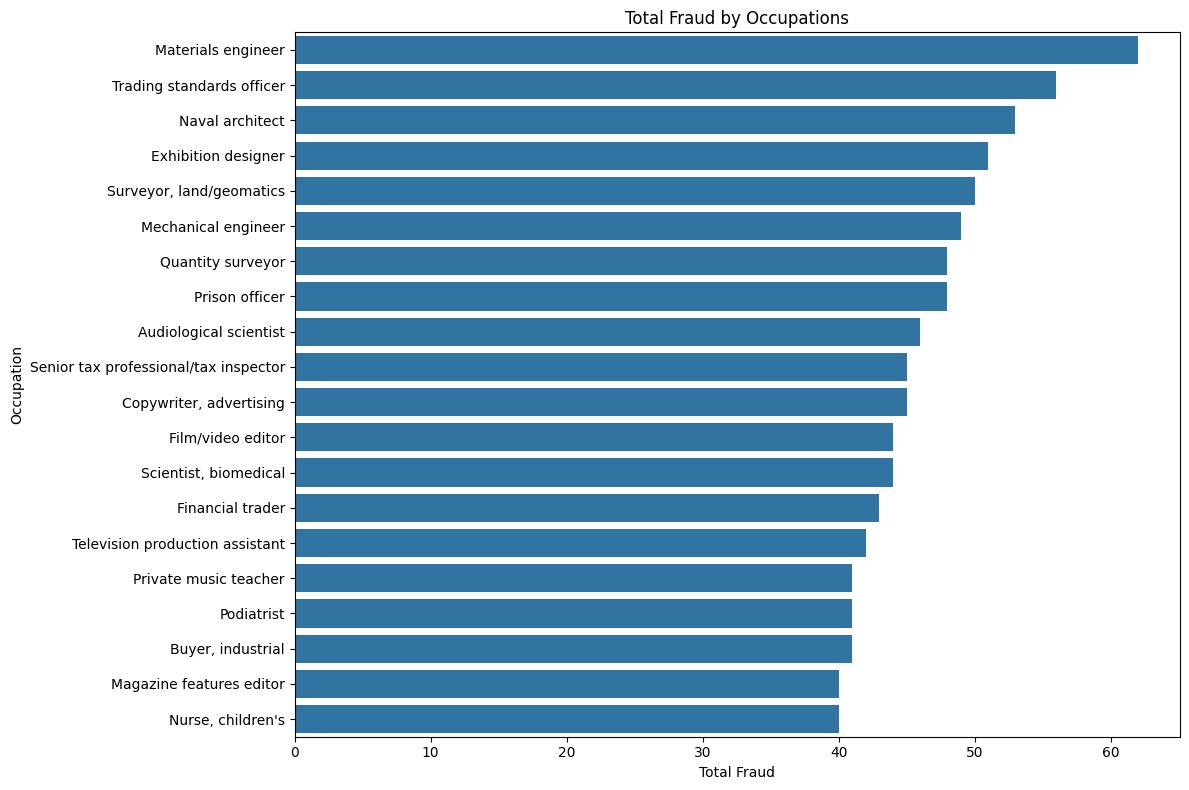

In [ ]:
#Fraud per occupation
occupation_total_fraud = new_df.groupby('job')['is_fraud'].sum().reset_index()

# Sorting by amount in descending order
occupation_total_fraud_sort = occupation_total_fraud.sort_values(by='is_fraud', ascending=False)

top_n = 20

fraud_occupation_totals = occupation_total_fraud_sort.head(top_n)

# Creating a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(y='job', x='is_fraud', data=fraud_occupation_totals)
plt.title('Total Fraud by Occupations')
plt.xlabel('Total Fraud')
plt.ylabel('Occupation')
plt.tight_layout()
plt.show()

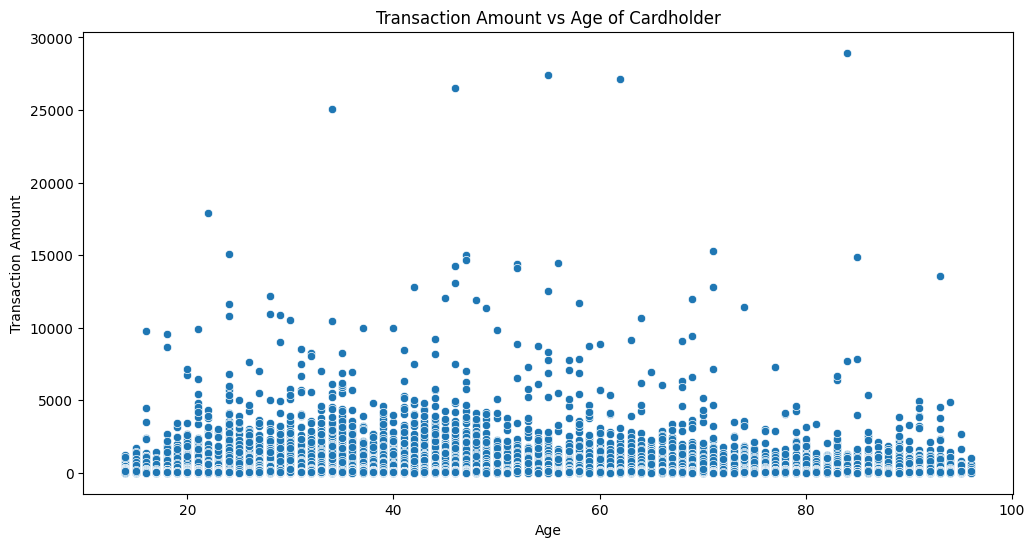

In [ ]:
# Age vs Transaction Amount
# relationship between the age of the cardholder and the amount of the transaction.
# Plot age vs transaction amount
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='amt', data=new_df)
plt.title('Transaction Amount vs Age of Cardholder')
plt.xlabel('Age')
plt.ylabel('Transaction Amount')
plt.show()




 Conclusion :The scatter plot shows that there is no clear relationship between the age of the cardholder and the transaction amount.
 There are some outliers with high transaction amounts, but overall the distribution is fairly even across all ages.

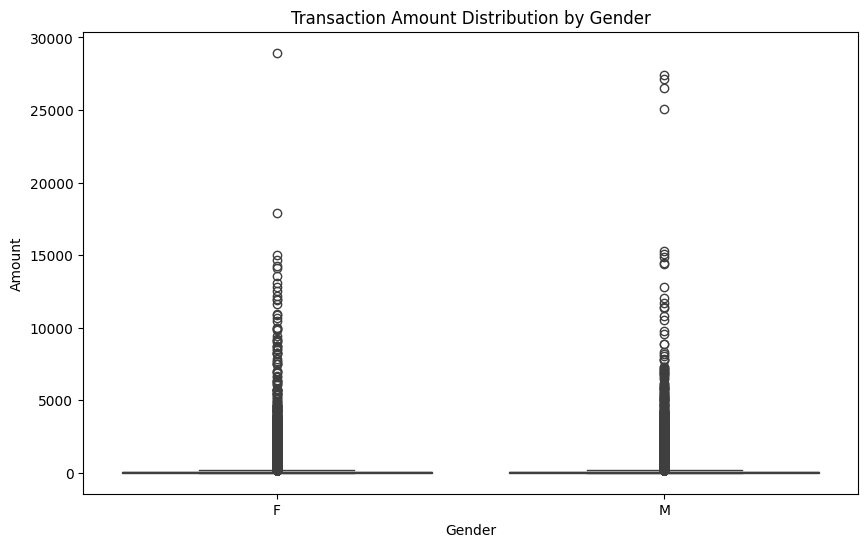

In [ ]:
# Gender and Transaction Amount
# Plot transaction amount distribution by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='amt', data=new_df)
plt.title('Transaction Amount Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.show()

# The scatter plot shows the relationship between transaction amount and age of card holder.
# There is no visible trend between the two variables. This suggests that the age of a card holder is not a significant factor
# in predicting the amount of their transaction.

Conclusion :
The scatter plot shows the relationship between transaction amount and gender of card holder. There is no visible trend between the two variables.

job
Ship broker                          874.505714
Engineer, site                       732.478333
Air traffic controller               719.814118
Contracting civil engineer           700.092857
Sales promotion account executive    691.478571
                                        ...    
Engineer, communications              52.510970
Travel agency manager                 51.063337
Seismic interpreter                   50.519229
Tour manager                          50.266647
Therapist, sports                     47.170546
Name: amt, Length: 494, dtype: float64


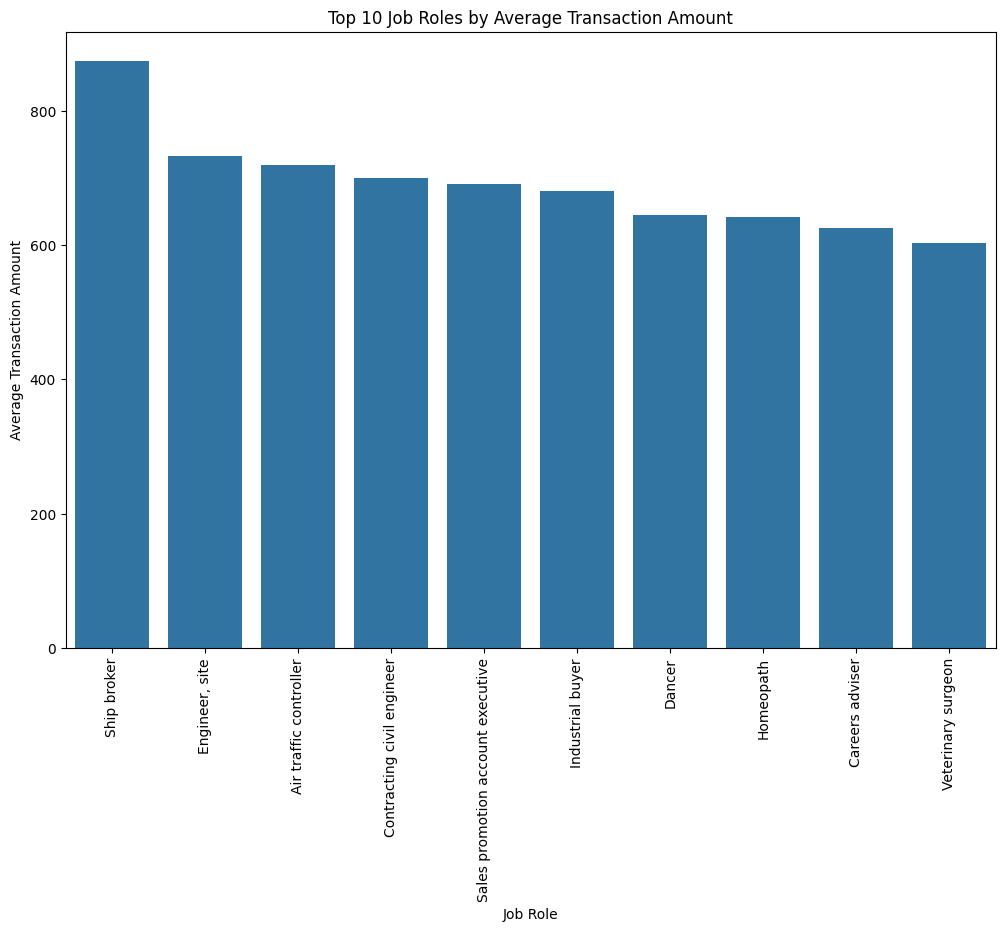

In [ ]:
# # Average transaction amount by job role
job_avg_amt = new_df.groupby('job')['amt'].mean().sort_values(ascending=False)
print(job_avg_amt)

# Plot top 10 job roles by average transaction amount
plt.figure(figsize=(12, 8))
sns.barplot(x=job_avg_amt.head(10).index, y=job_avg_amt.head(10).values)
plt.title('Top 10 Job Roles by Average Transaction Amount')
plt.xlabel('Job Role')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=90)
plt.show()

Correlation Analysis

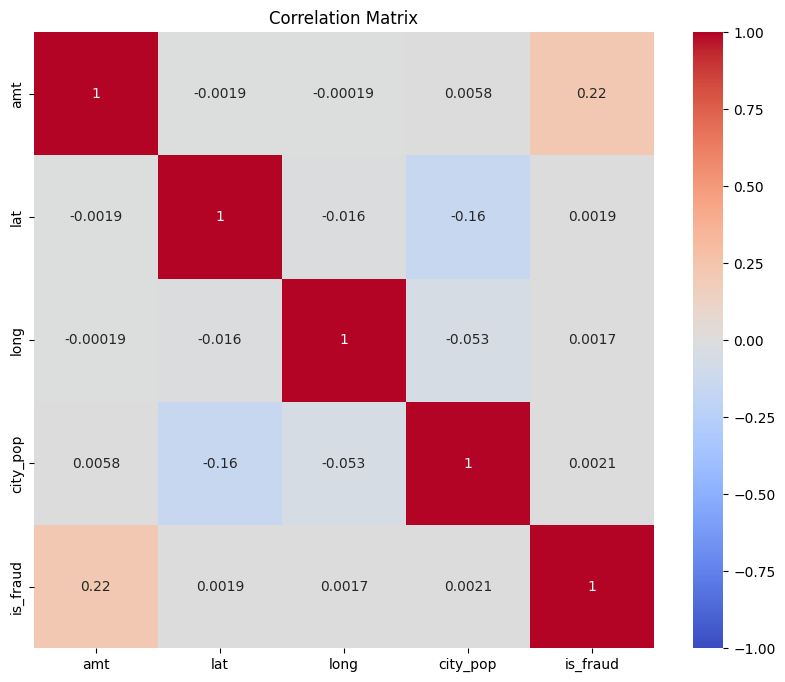

In [ ]:
#correlations between different numerical features in the dataset.
# Calculate correlation matrix
correlation_matrix = new_df[['amt', 'lat', 'long', 'city_pop','is_fraud']].corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
fraud_summary = new_df.groupby('is_fraud').agg({
    'amt': ['mean', 'median', 'std', 'sum'],
    'category': 'count',
    'merchant': 'count'
}).reset_index()

fraud_summary.columns = ['Fraudulent', 'Average Amount', 'Median Amount', 'Amount Std Dev', 'Total Amount', 'Category Count', 'Merchant Count']
fraud_summary

,Fraudulent,Average Amount,Median Amount,Amount Std Dev,Total Amount,Category Count,Merchant Count
0,0,67.667110,47.280,154.007971,87234340.29,1289169,1289169
1,1,531.320092,396.505,390.560070,3988088.61,7506,7506


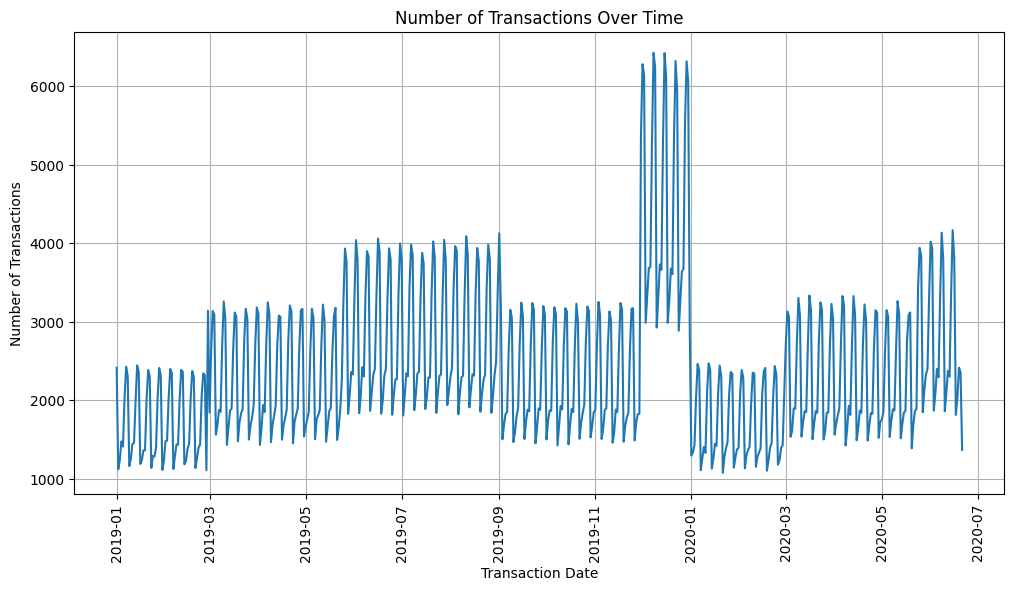

In [ ]:
num_of_trans = new_df.groupby('trans_date').size().to_frame('num_of_trans').reset_index()
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)
plt.title('Number of Transactions Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Number of Transactions')
sns.lineplot(x='trans_date', y='num_of_trans', data = num_of_trans)
plt.grid(True)
plt.show()



Conclusion : The graph shows a time series of the number of transactions over time. The data shows a strong seasonal pattern with peaks around the end of each month and troughs in the middle of the month. This suggests that the transactions are related to a monthly cycle, such as a billing cycle. The data also shows a general upward trend from the beginning of 2019 to the end of 2020. This suggests that the business is growing and attracting more customers. However, there is a significant drop in transactions starting in the middle of 2020.

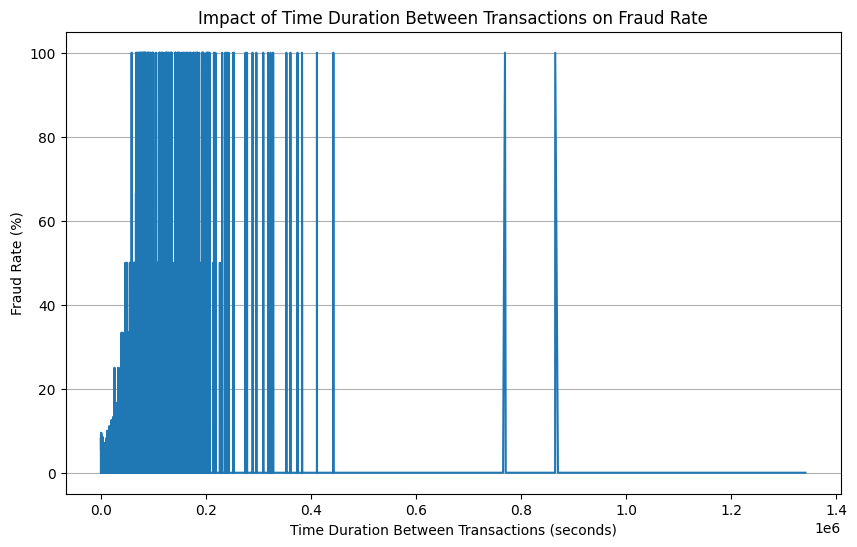

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Convert 'trans_date_trans_time' column to datetime format
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Sort dataframe by card number and transaction time
df.sort_values(['cc_num', 'trans_date_trans_time'], inplace=True)

# Calculate time duration between consecutive transactions for each cardholder
df['time_duration'] = df.groupby('cc_num')['trans_date_trans_time'].diff().dt.total_seconds()

# Remove NaN values resulting from the diff operation
df.dropna(subset=['time_duration'], inplace=True)

# Compute fraud rate for each time duration
fraud_rate = df.groupby('time_duration')['is_fraud'].mean() * 100

# Plot the relationship between time duration and fraud rate
plt.figure(figsize=(10, 6))
plt.plot(fraud_rate.index, fraud_rate.values)
plt.xlabel('Time Duration Between Transactions (seconds)')
plt.ylabel('Fraud Rate (%)')
plt.title('Impact of Time Duration Between Transactions on Fraud Rate')
plt.grid(axis='y')
plt.show()

Conclusion : The graph shows that the fraud rate is higher for transactions that happen within a short time duration, around 0.1 seconds and 0.2 seconds.

Outliers:


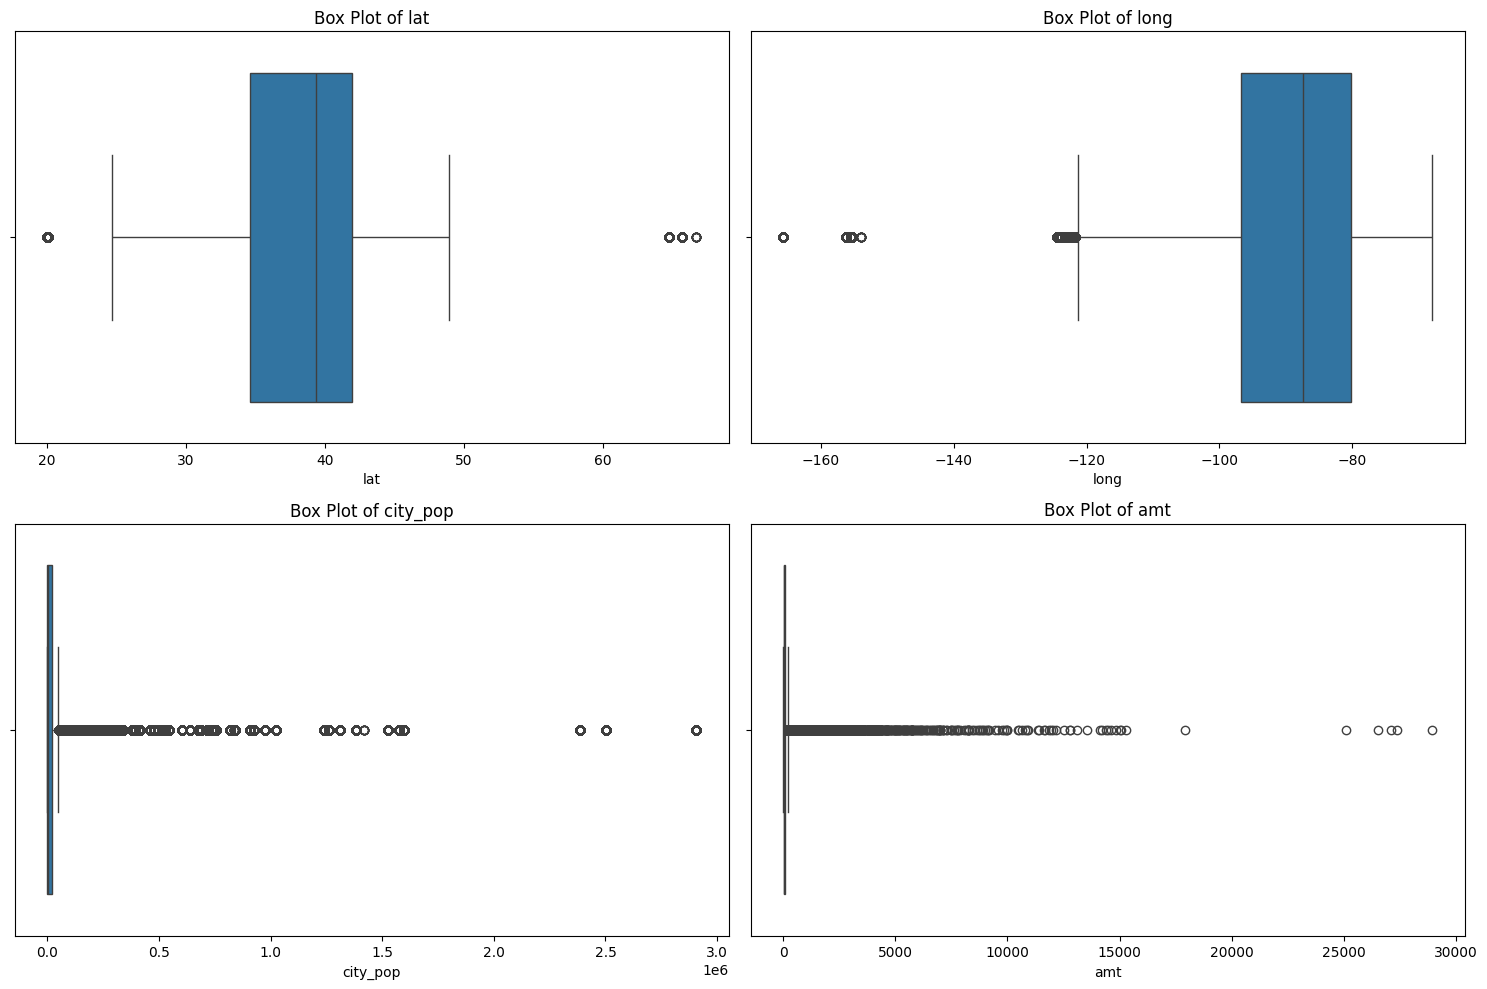

In [ ]:
# Outliers for numerical features

import matplotlib.pyplot as plt
import seaborn as sns

features = ['lat', 'long', 'city_pop','amt']

# Create box plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=new_df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

In [ ]:
def find_outliers_iqr(new_df, column):
    Q1 = new_df[column].quantile(0.25)
    Q3 = new_df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Use new_df consistently for filtering
    return new_df[(new_df[column] < lower_bound) | (new_df[column] > upper_bound)]

# Identify outliers for each feature
outliers_lat = find_outliers_iqr(new_df, 'lat')
outliers_long = find_outliers_iqr(new_df, 'long')
outliers_city_pop = find_outliers_iqr(new_df, 'city_pop')
outliers_amt = find_outliers_iqr(new_df, 'amt')

print(f"Outliers in Latitude:\n{outliers_lat}")
#print(f"Outliers in Longitude:\n{outliers_long}")
#print(f"Outliers in City Population:\n{outliers_city_pop}")
#print(f"Outliers in Transaction Amount:\n{outliers_amt}")

Outliers in Latitude:
                      cc_num                            merchant  \
28       4225990116481262579                     fraud_Kunze Inc   
236          341546199006537                 fraud_Hills-Witting   
256      4225990116481262579    fraud_Cormier, Stracke and Thiel   
433      4742883543039288059                fraud_Heller-Langosh   
671          341546199006537              fraud_Dickinson-Rempel   
...                      ...                                 ...   
1296297  4225990116481262579   fraud_Boehm, Predovic and Reinger   
1296359     3576144910346950                     fraud_Emard Inc   
1296363     3576144910346950                    fraud_Huels-Hahn   
1296372  4742883543039288059  fraud_Swift, Bradtke and Marquardt   
1296600     3576144910346950                  fraud_Predovic Inc   

              category     amt      first     last gender  \
28         grocery_pos   90.22      Brian  Simpson      M   
236       shopping_net    8.70       Ma


**Group Comparisons**
(How the transaction amount varies across categorical features)


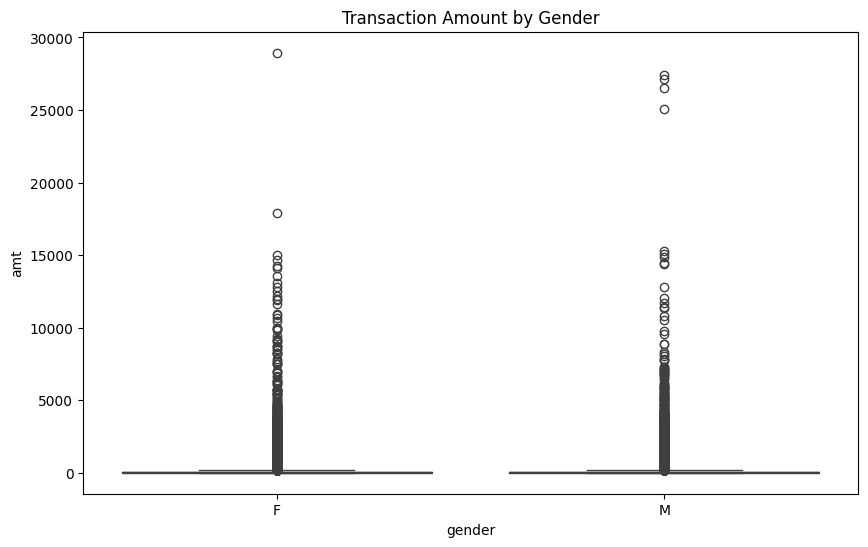

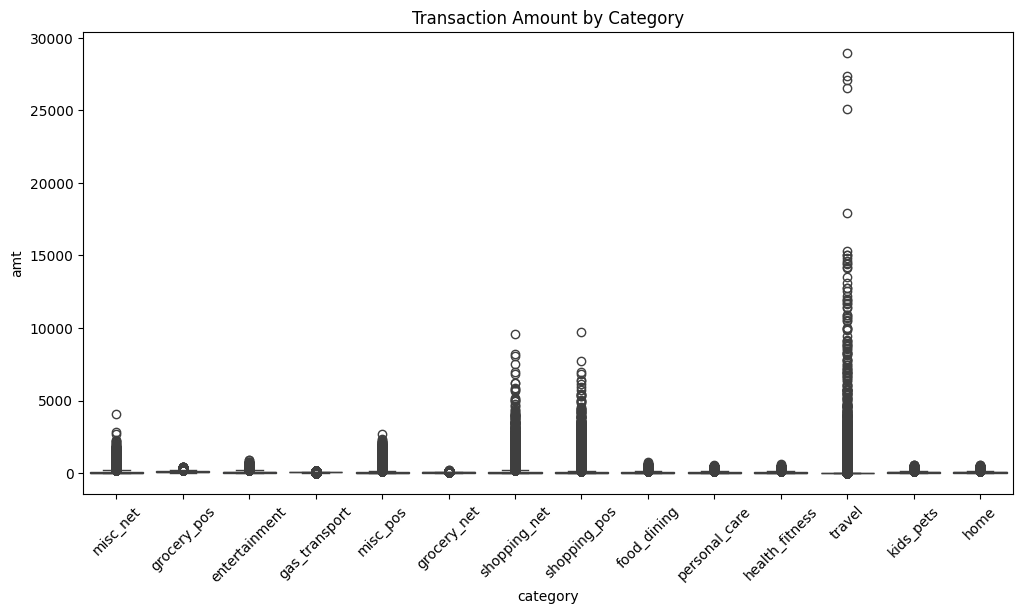

In [ ]:
# Box plot of transaction amounts by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='amt', data=new_df)
plt.title('Transaction Amount by Gender')
plt.show()

# Box plot of transaction amounts by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='amt', data=new_df)
plt.title('Transaction Amount by Category')
plt.xticks(rotation=45)
plt.show()


Conclusion : Shows a box plot of the transaction amount by category. The category with the highest transaction amount is travel, followed by shopping_net, and shopping_pos. The category with the lowest transaction amount is personal_care. It can be concluded that people tend to spend more money on travel and shopping than on personal care.

<ipython-input-13-dcf2b6256c74>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_df['trans_hour'] = pd.to_datetime(new_df['trans_time']).dt.hour


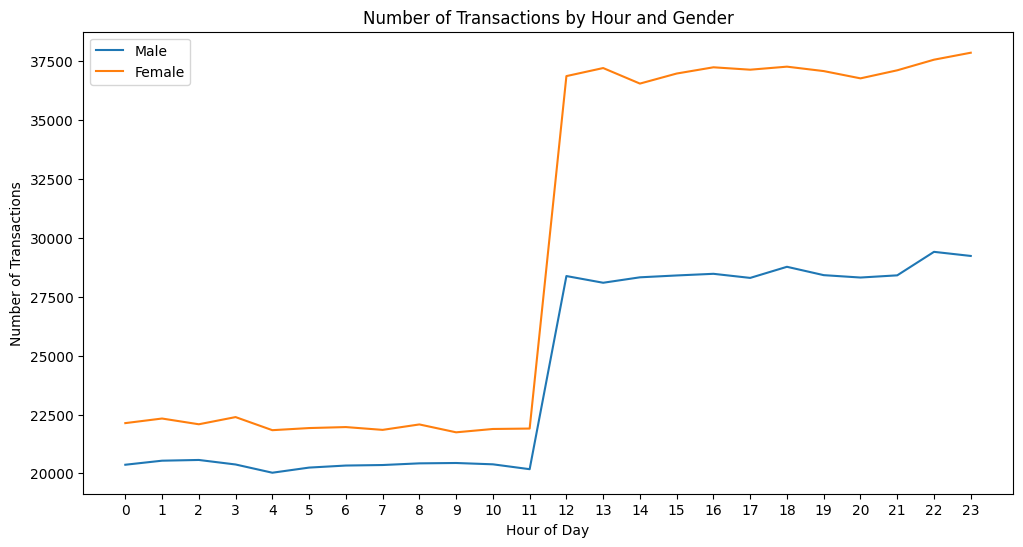

In [ ]:
#The hours of all transactions with respect to gender

# Assuming 'gender' column contains 'M' and 'F' values

new_df['trans_hour'] = pd.to_datetime(new_df['trans_time']).dt.hour

hourly_transactions_male = new_df[new_df['gender'] == 'M'].groupby('trans_hour').size()
hourly_transactions_female = new_df[new_df['gender'] == 'F'].groupby('trans_hour').size()


plt.figure(figsize=(12, 6))
plt.plot(hourly_transactions_male.index, hourly_transactions_male.values, label='Male')
plt.plot(hourly_transactions_female.index, hourly_transactions_female.values, label='Female')


plt.title('Number of Transactions by Hour and Gender')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))  # because we have a 24hr format

plt.legend() #added on the top left, for making visualization easier

plt.show()

#showing that for one gender, transactions sharply increase at a specific hour and remain consistently high,...
#...while for the other gender, transactions increase more gradually over time.

<ipython-input-14-1c858e0bfaf4>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fraud_df['trans_hour'] = pd.to_datetime(new_df['trans_time']).dt.hour
<ipython-input-14-1c858e0bfaf4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud_df['trans_hour'] = pd.to_datetime(new_df['trans_time']).dt.hour


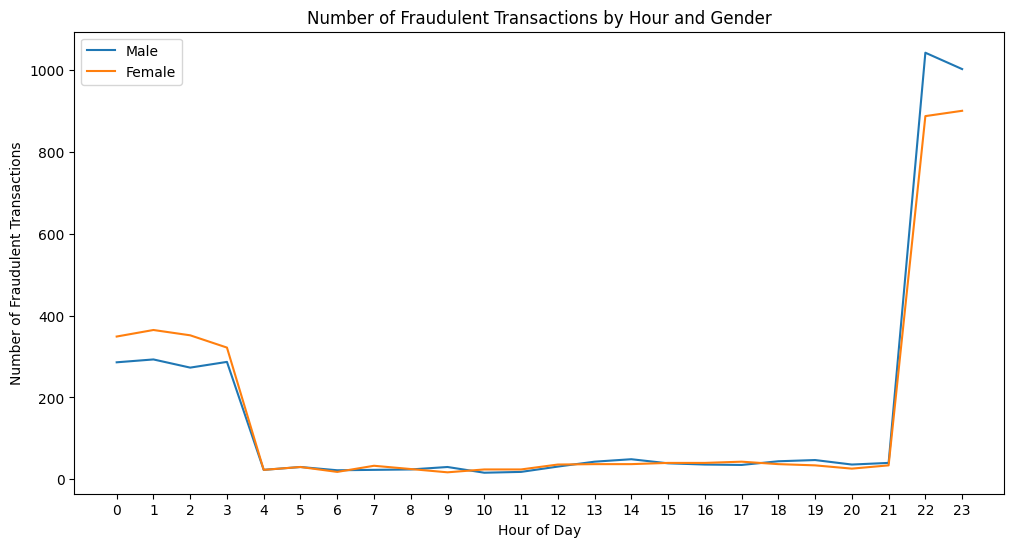

In [ ]:
#The hours of ONLY fraudulent transactions with respect to gender

#Filtering to only fraudulent trasactions
fraud_df = df[df['is_fraud'] == 1]
fraud_df['trans_hour'] = pd.to_datetime(new_df['trans_time']).dt.hour

hourly_fraud_male = fraud_df[fraud_df['gender'] == 'M'].groupby('trans_hour').size()
hourly_fraud_female = fraud_df[fraud_df['gender'] == 'F'].groupby('trans_hour').size()

plt.figure(figsize=(12, 6))
plt.plot(hourly_fraud_male.index, hourly_fraud_male.values, label='Male')
plt.plot(hourly_fraud_female.index, hourly_fraud_female.values, label='Female')

plt.title('Number of Fraudulent Transactions by Hour and Gender')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(range(0, 24))  # because we have a 24 hr format
plt.legend()

plt.show()

#The line graph depicts a trend in fraudulent transactions by gender across different hours
#with both genders showing a spike in fraud at the end of the day.

Conclusion : The graph shows that the number of fraudulent transactions is highest between 9 PM and 11 PM for both males and females. However, there are slightly more fraudulent transactions by males than females between 9 PM and 11 PM.

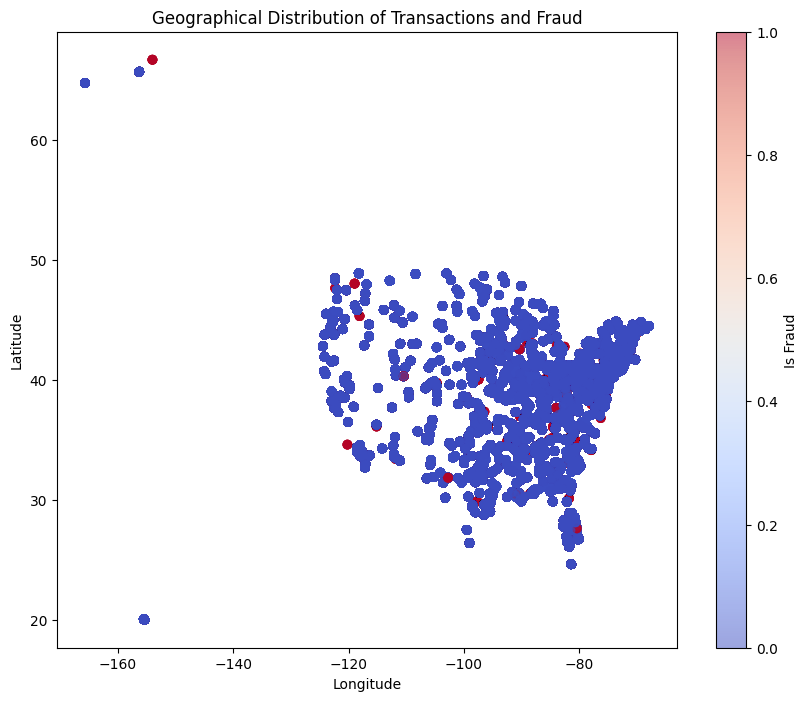

In [ ]:
# Scatter plot of geographical data
plt.figure(figsize=(10, 8))
plt.scatter(new_df['long'], new_df['lat'], c=new_df['is_fraud'], cmap='coolwarm', alpha=0.5)
plt.title('Geographical Distribution of Transactions and Fraud')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Is Fraud')
plt.show()

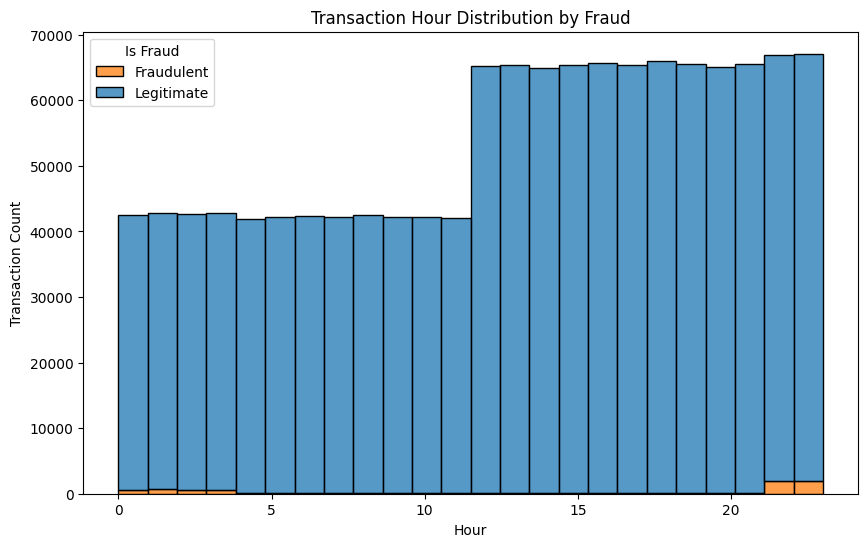

In [ ]:
# Transaction Time and Fraud Correlation
plt.figure(figsize=(10, 6))
sns.histplot(data=new_df, x='trans_hour', hue='is_fraud', multiple='stack', bins=24)
plt.title('Transaction Hour Distribution by Fraud')
plt.xlabel('Hour')
plt.ylabel('Transaction Count')
plt.legend(title='Is Fraud', labels=['Fraudulent', 'Legitimate'])  # Specify legend labels
plt.show()

Conclusion : The graph shows the distribution of fraudulent and legitimate transactions by hour. The majority of transactions are legitimate, with a peak in the middle of the day. There are very few fraudulent transactions, and their distribution is relatively uniform across the hours.

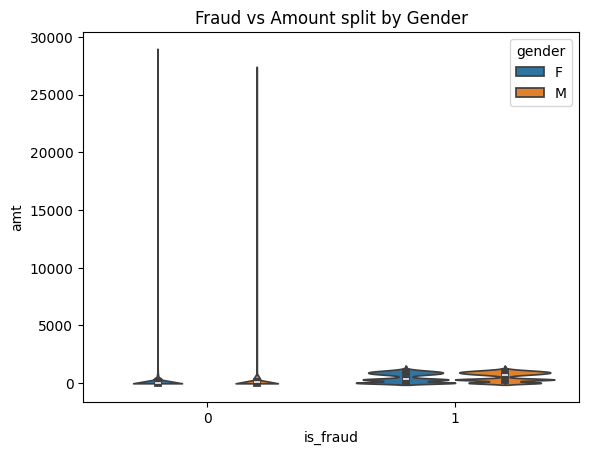

In [ ]:
# Violinplot of Amount against fraud classfication split by gender

sns.violinplot(x='is_fraud', y='amt', hue='gender', data=new_df)
plt.title('Fraud vs Amount split by Gender')
plt.show()

Conclusion : The plot shows that the amount spent by both males and females has a similar distribution and are centered around 0, both with outliers reaching upto 30,000. We can infer that the amount spent is not a major contributor to fraud

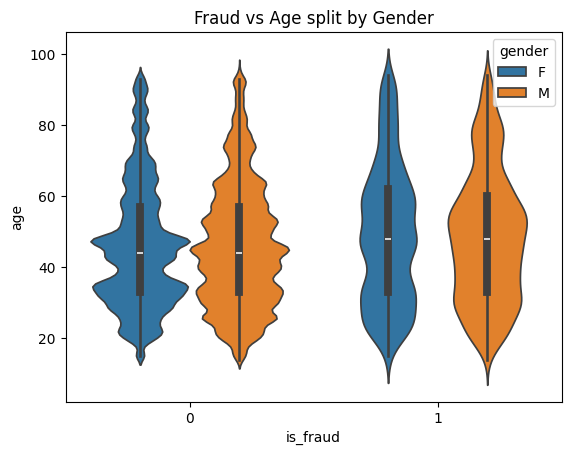

In [ ]:
# Violin plot of Age against fraud classification split by gender
sns.violinplot(x='is_fraud', y='age', hue='gender', data=new_df)
plt.title('Fraud vs Age split by Gender')
plt.show()

Conclusion : The plot shows that there is no clear pattern in the age distributions of fraudulent and non-fraudulent transactions between genders, both men and women are spread across the age range. The plot also shows that the age of people who committed fraud is similar for both genders.This suggests there may be a connection between age, gender, and the likelihood of being not fraud.